# <u>Diabetes Prediction using Machine Learning </u>

## Table of Contents

* [Problem Statement](#section1)<br>
* [Importing Packages](#section3)<br/>
* [Understanding the diabetes Dataset](#section4)<br/>
    - * [Data Types and Dimensions](#Data_Types)<br/>
    - * [Statistical Summary](#Statistical_Summary)<br/>
    - * [Checking for Missing Values](#Checking_for_Missing_Values)
    
* [EDA](#section7)<br/>
* [Data Preprocessing](#Data_Preprocessing)<br/>
* [Logistic regression using SGD](#section19)<br/>
* [Random Forest](#section20)<br/>
* [Adaboost](#section21)<br/>
* [Conclusion](#section22)<br/>  

### * Problem Statement

The objective of this project is to classify whether someone has diabetes or not 

### * Importing libraries

In [47]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
warnings.filterwarnings("ignore")

- Reading the diabetes csv file

In [48]:
#Loading the dataset
diabetes_data = pd.read_csv("D:\Logistic regression Diabetes\diabetes.csv")

### * Understanding the Diabetes Dataset

In [49]:
#Print the first 5 rows of the dataframe.
diabetes_data.sample(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
713,0,134,58,20,291,26.4,0.352,21,0
252,2,90,80,14,55,24.4,0.249,24,0
667,10,111,70,27,0,27.5,0.141,40,1
748,3,187,70,22,200,36.4,0.408,36,1
277,0,104,64,23,116,27.8,0.454,23,0
221,2,158,90,0,0,31.6,0.805,66,1
663,9,145,80,46,130,37.9,0.637,40,1


In [5]:
## gives information about the data types,columns, null value counts, memory usage etc
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Statistical summary

In [6]:
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### *Missing values

- Can minimum value of below listed columns be zero ?

  On these columns, a value of zero does not make sense and thus indicates missing value.

  Following columns or variables have an invalid zero value:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [50]:
# replacing the 0 values with Nan
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


- To fill these Nan values the data distribution needs to be understood

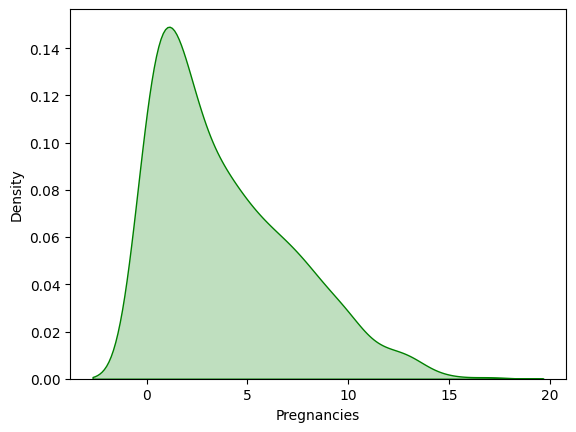

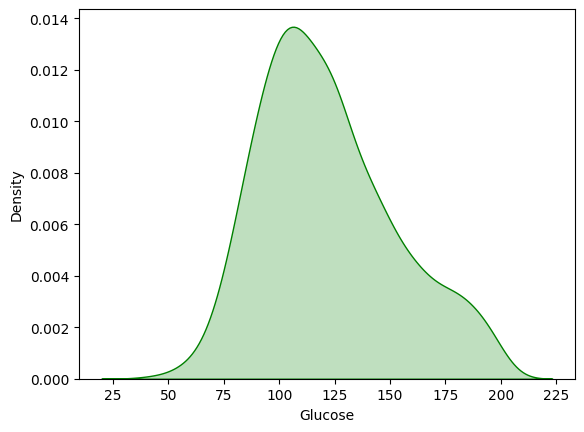

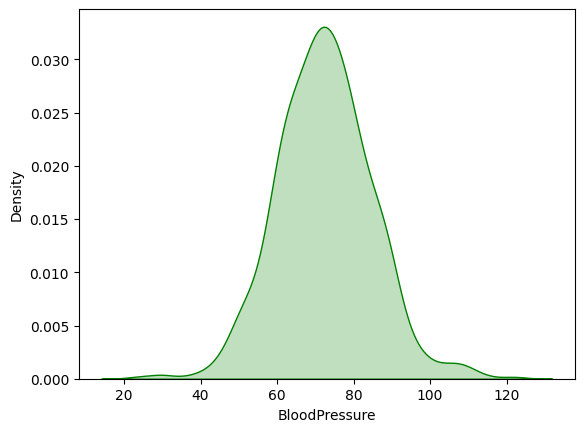

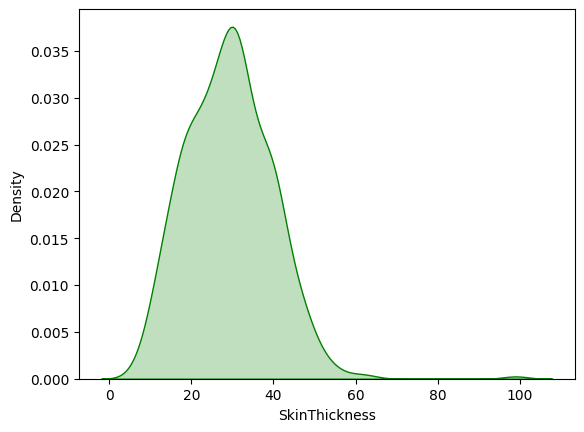

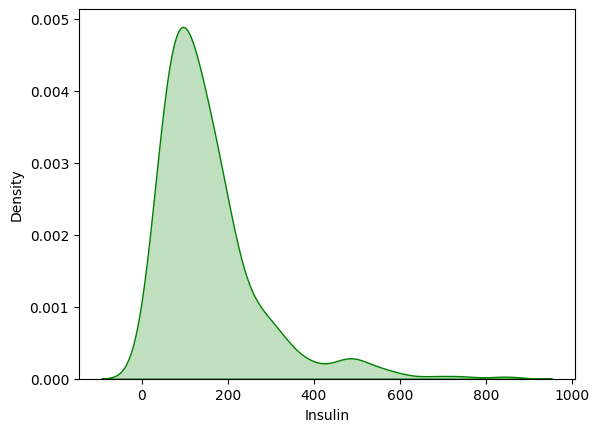

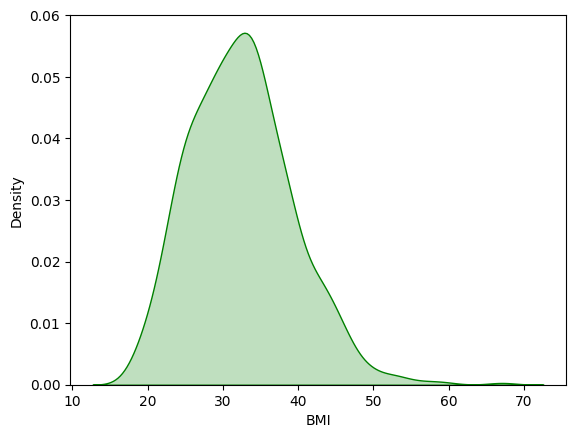

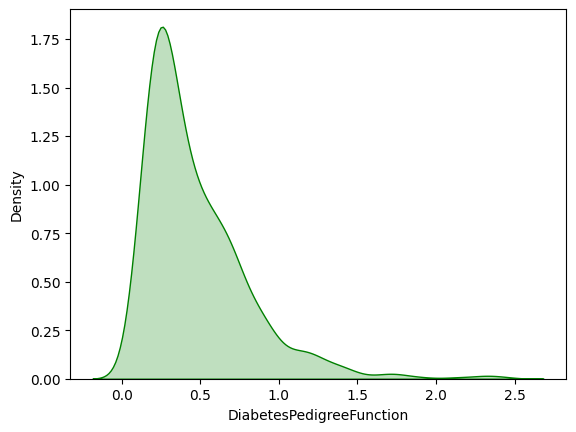

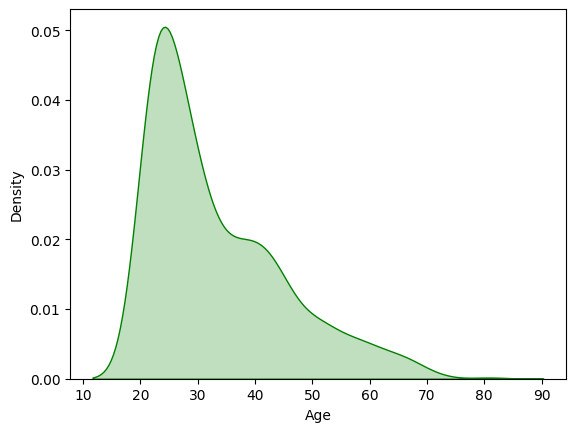

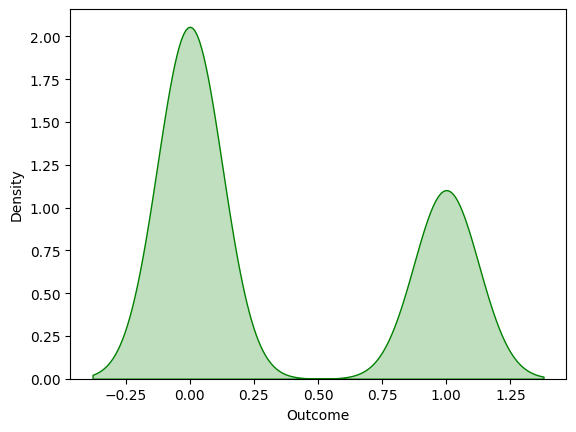

In [51]:
for column in diabetes_data.columns:
    plt.figure()
    sns.kdeplot(diabetes_data[column], shade =True, color="green")

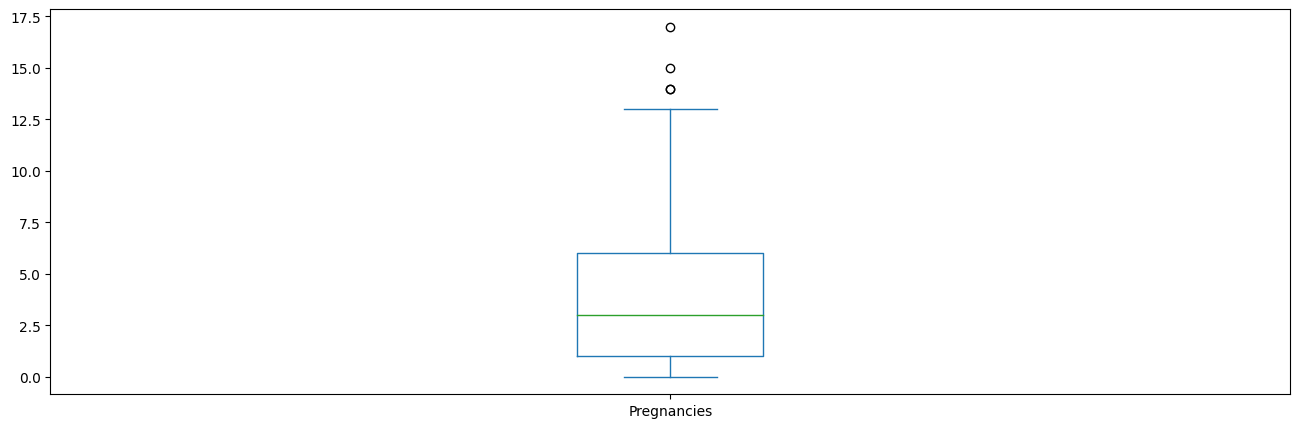

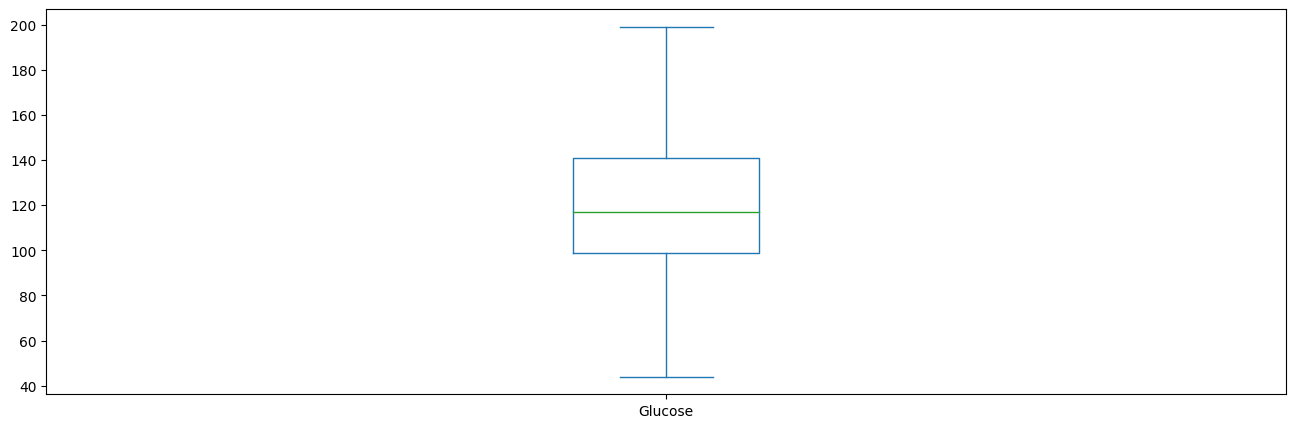

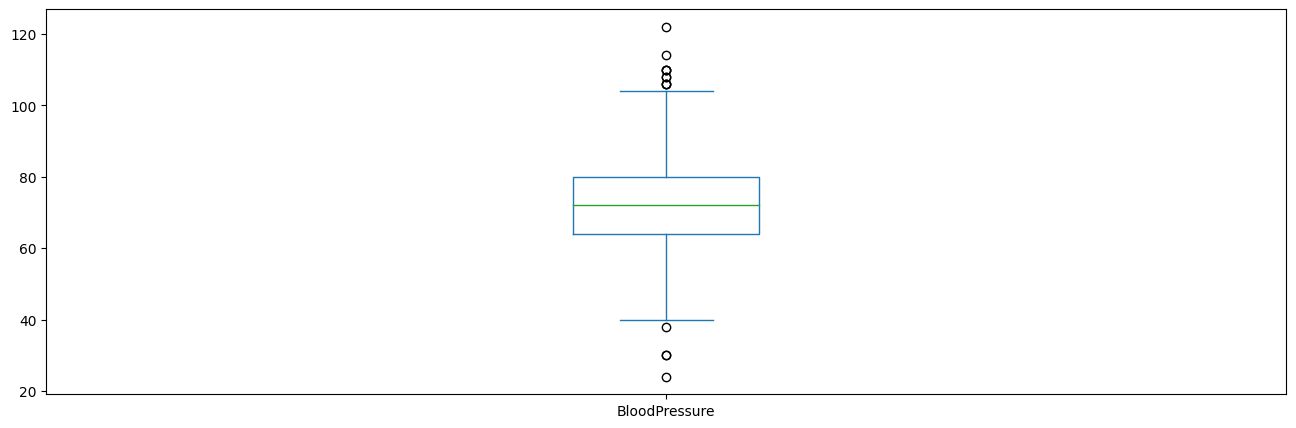

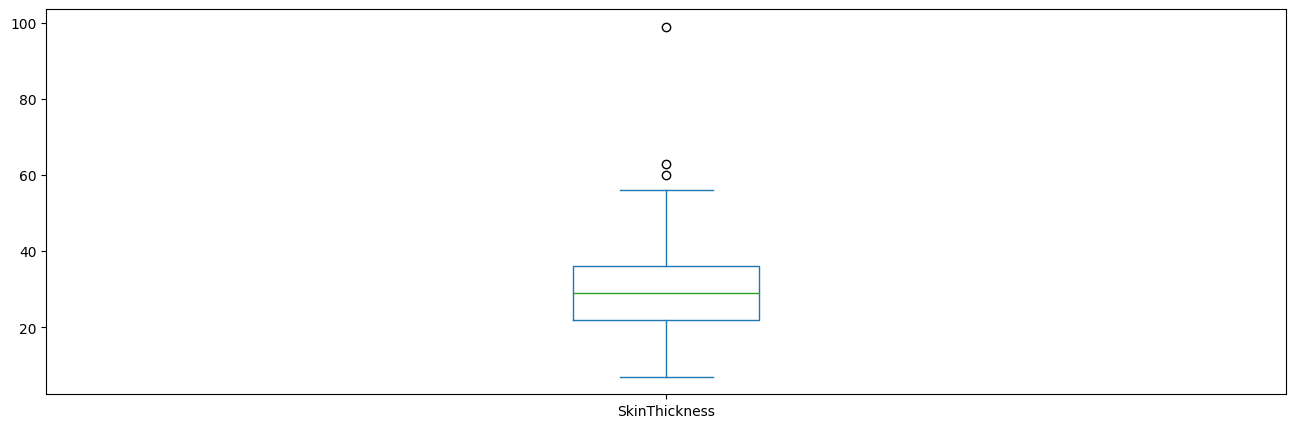

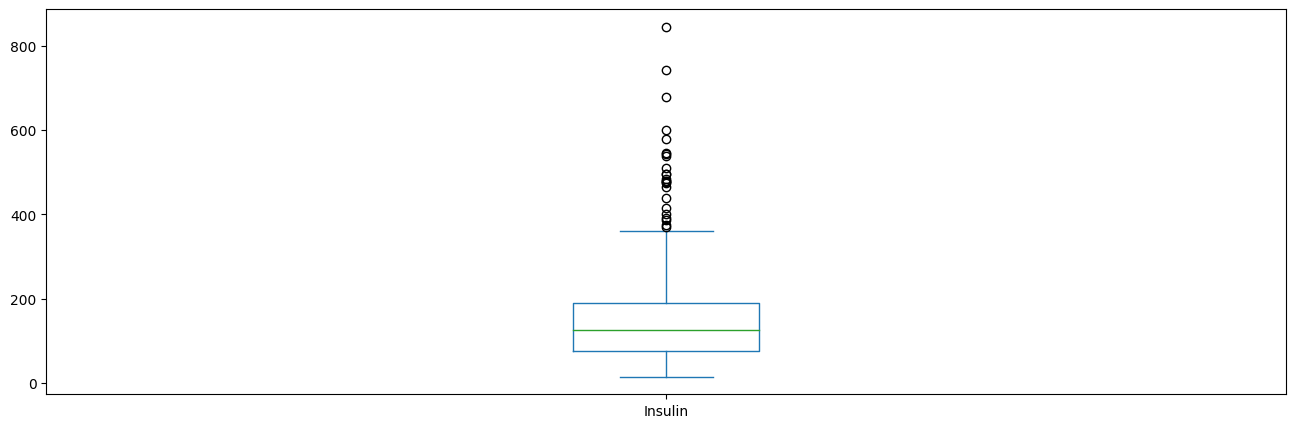

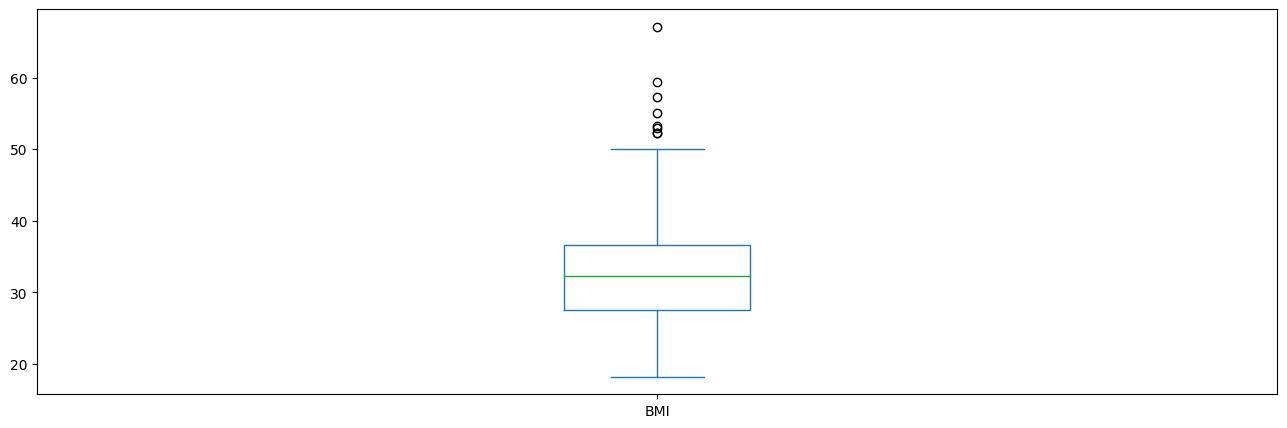

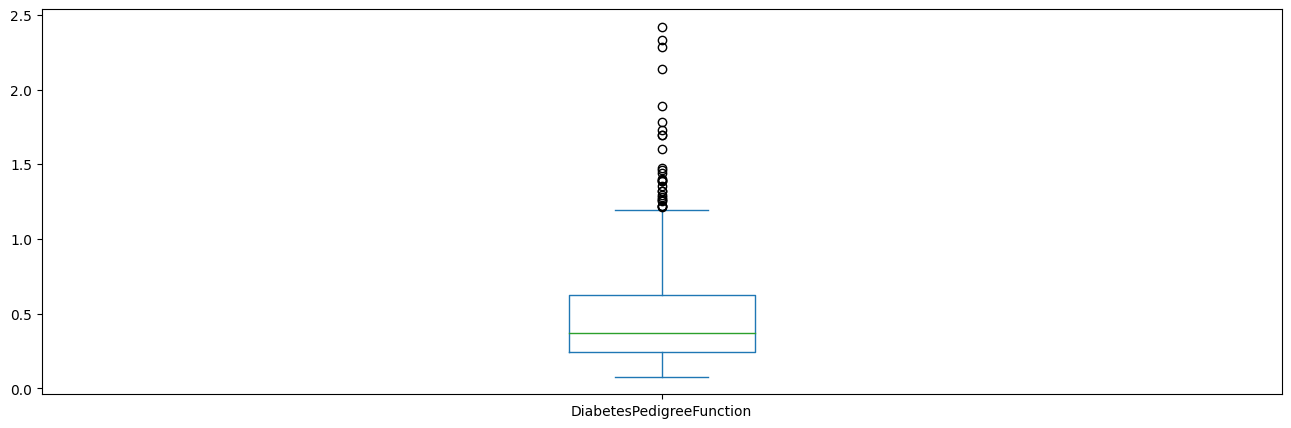

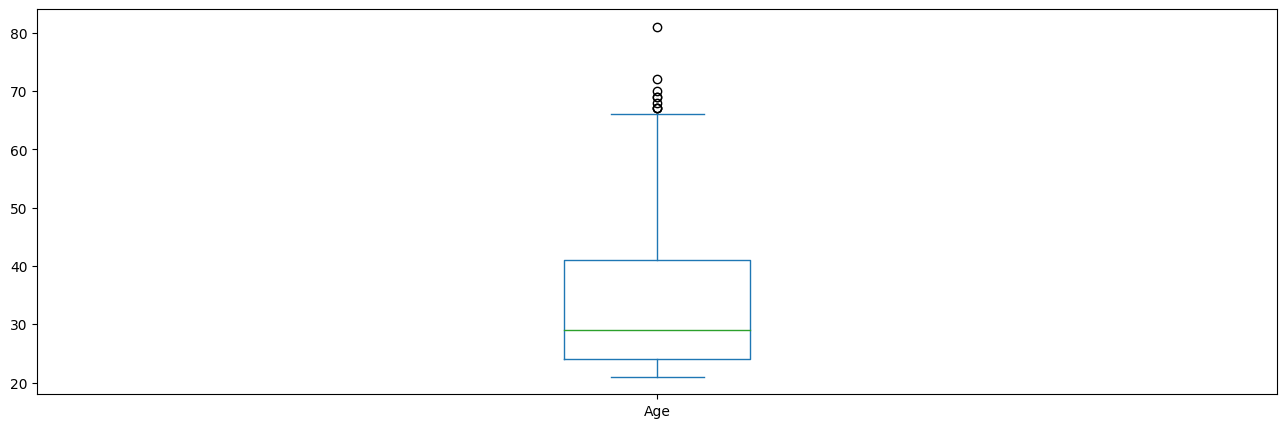

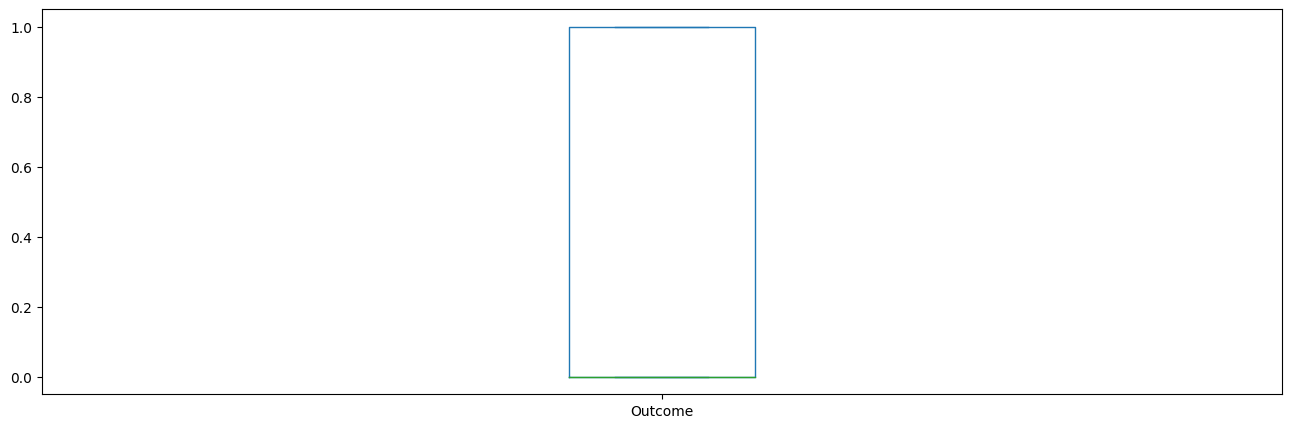

In [52]:
for column in diabetes_data.columns:
    plt.figure()
    diabetes_data[column].plot.box(figsize=(16,5))

### Assigning nan values for the columns in accordance with their distribution

In [53]:
#Glucose and Blood Pressure are almost normally distributed so we can impute missing values with mean

diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)

diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)

#since skin thickness, Insulin and BMI are highly positively skewed, imputing it with mean will be a wrong choice so we will replace it with median

diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)

diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)

diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

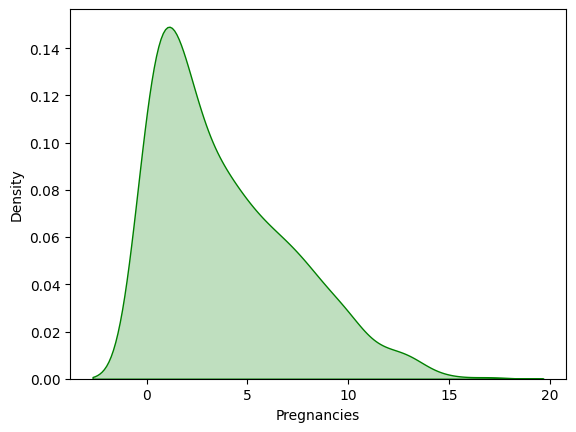

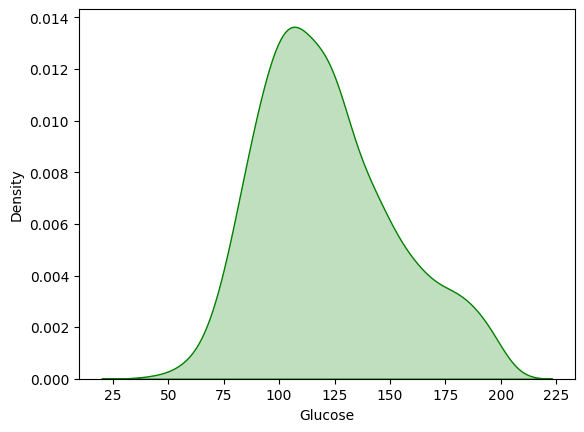

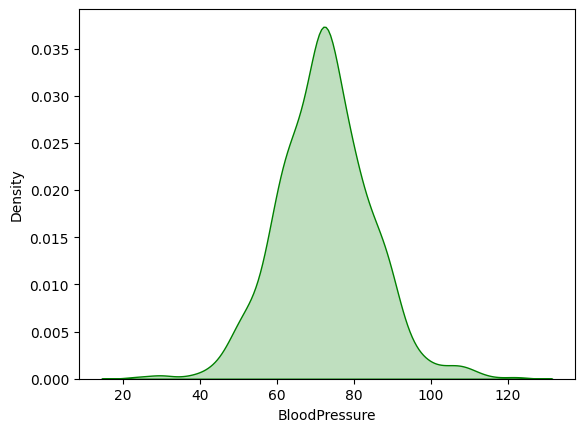

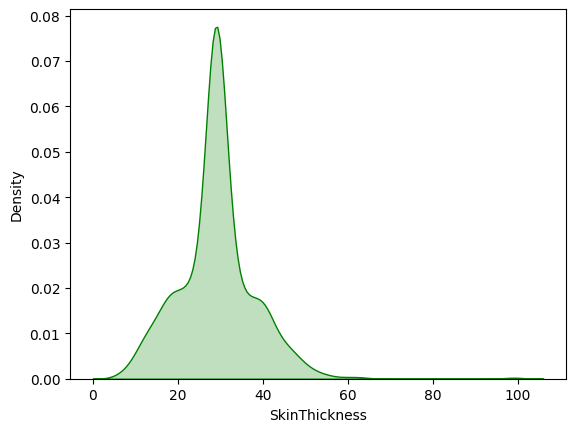

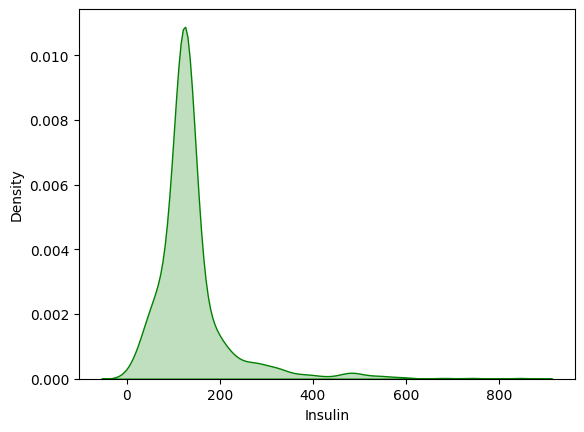

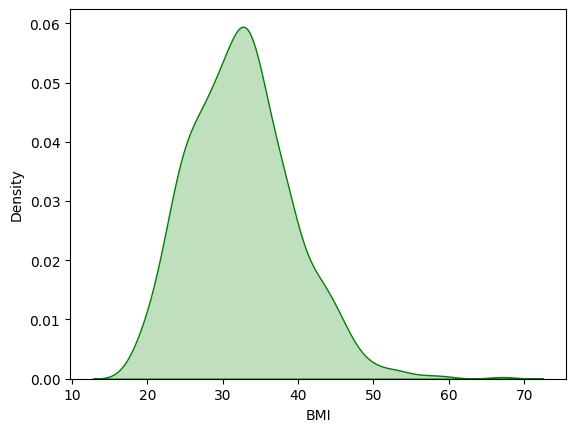

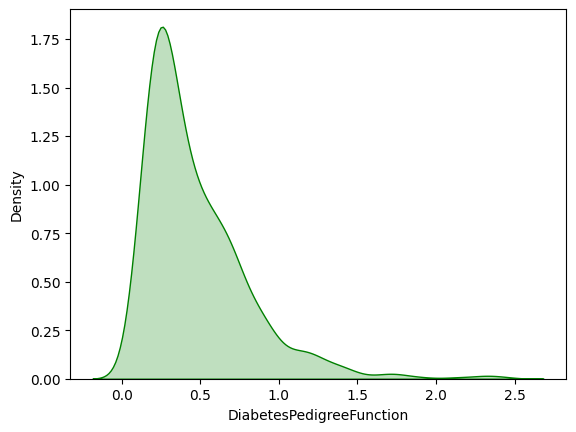

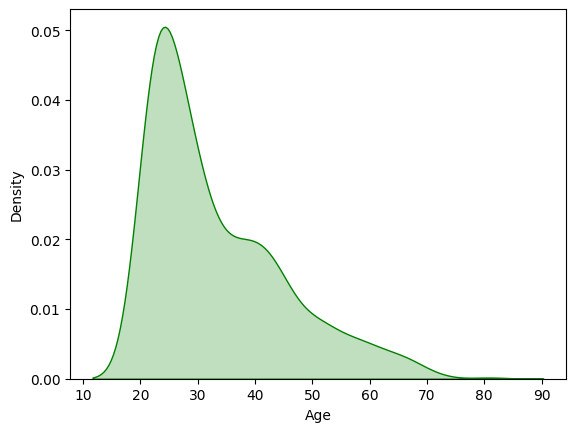

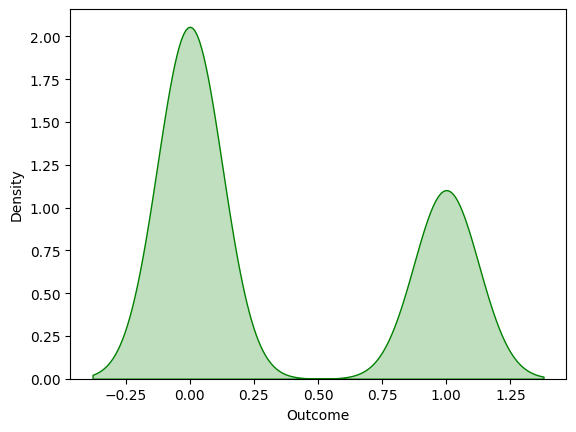

In [54]:
#checking distribution after imputing Nan values
for column in diabetes_data.columns:
    plt.figure()
    sns.kdeplot(diabetes_data[column], shade =True, color="green")

In [11]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

In [55]:
#checking data type, null values and number of observations for each column
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


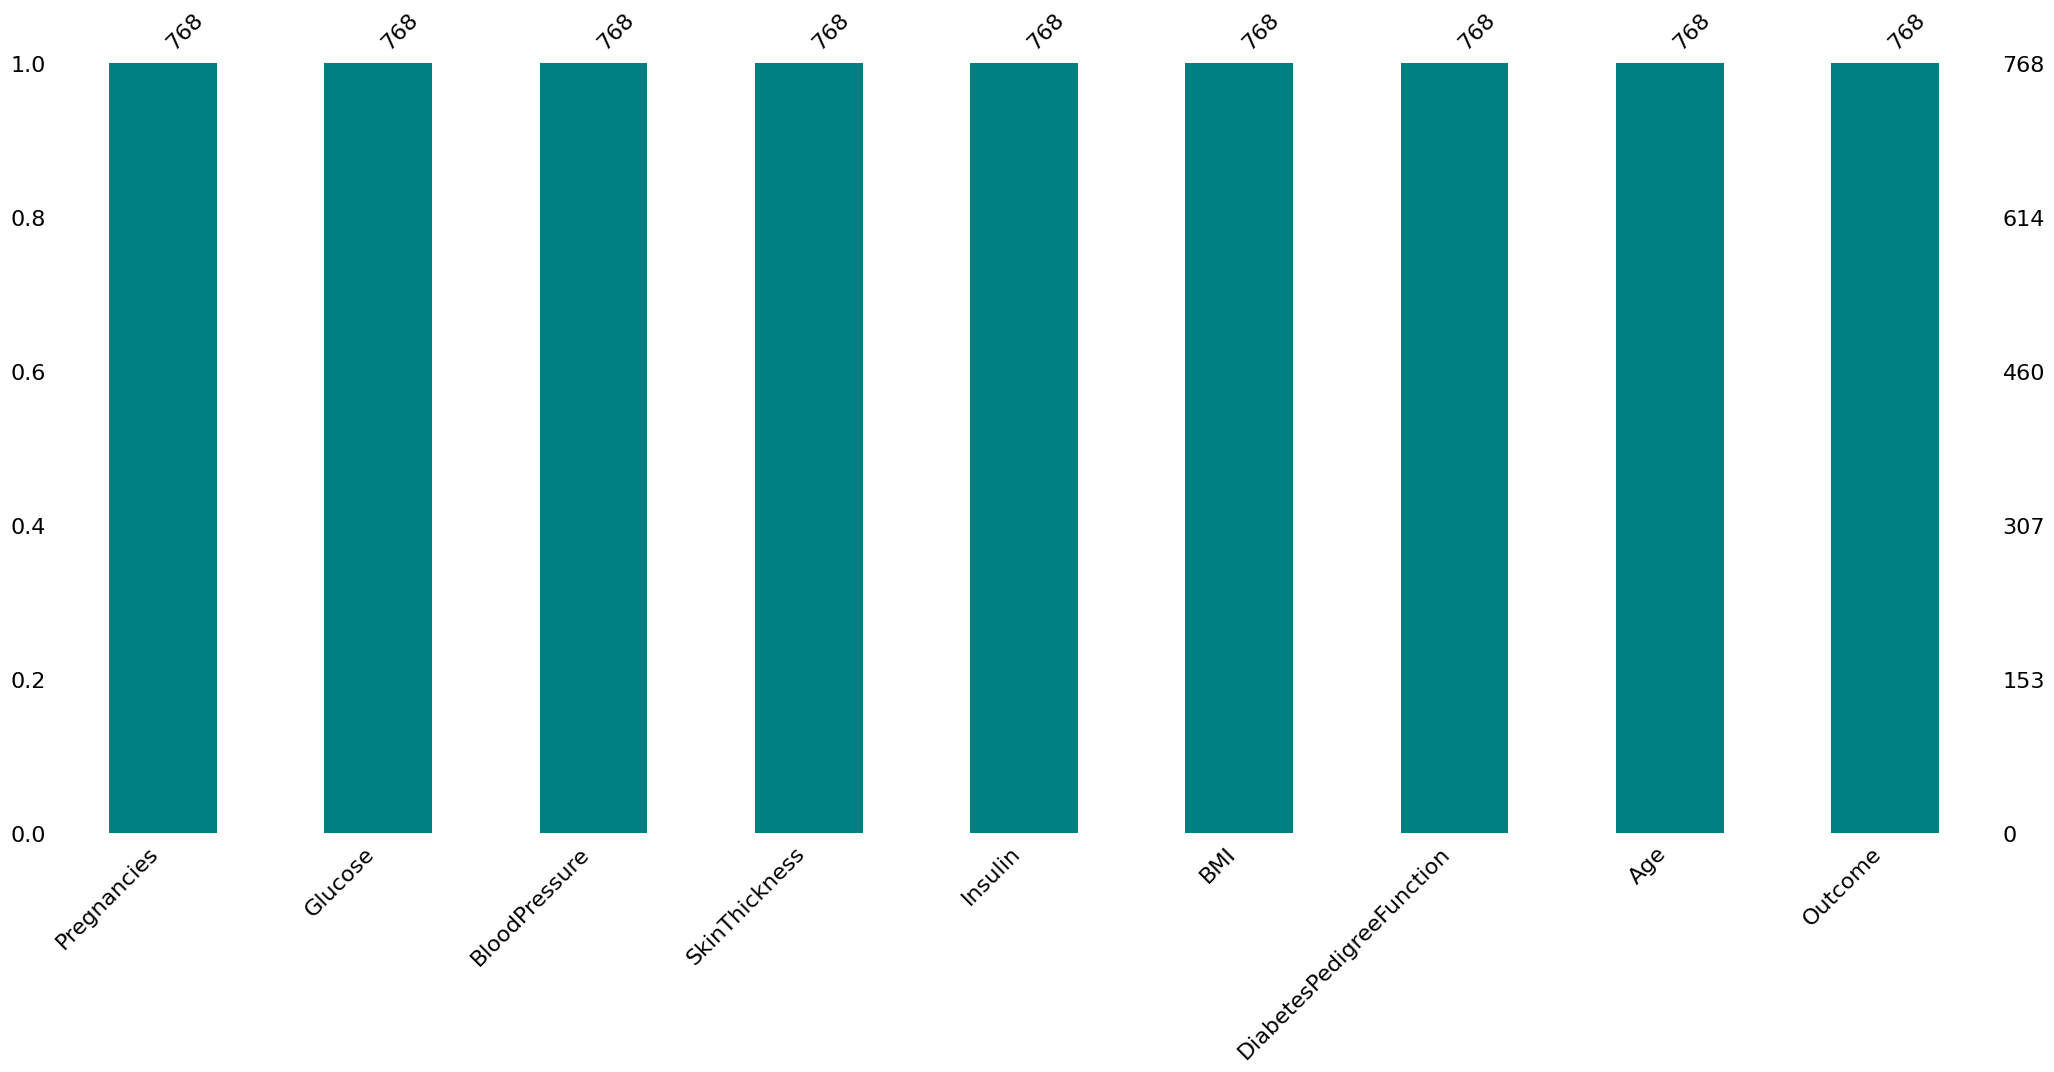

In [13]:
## null count analysis
import missingno as msno
p=msno.bar(diabetes_data,color='teal')

In [56]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### EDA

0    500
1    268
Name: Outcome, dtype: int64


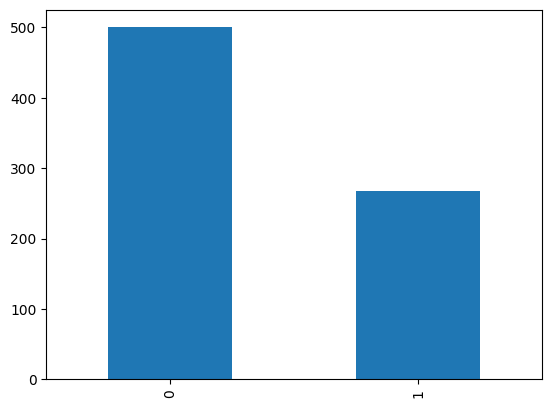

In [57]:
# checking the balance of the data by plotting the count of outcomes by their value
diabetes_data.Outcome.value_counts().plot(kind="bar")
print(diabetes_data.Outcome.value_counts())  
plt.show()

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

Hence we can say that data is imbalanced here

## Pair plot w.r.t Outcome

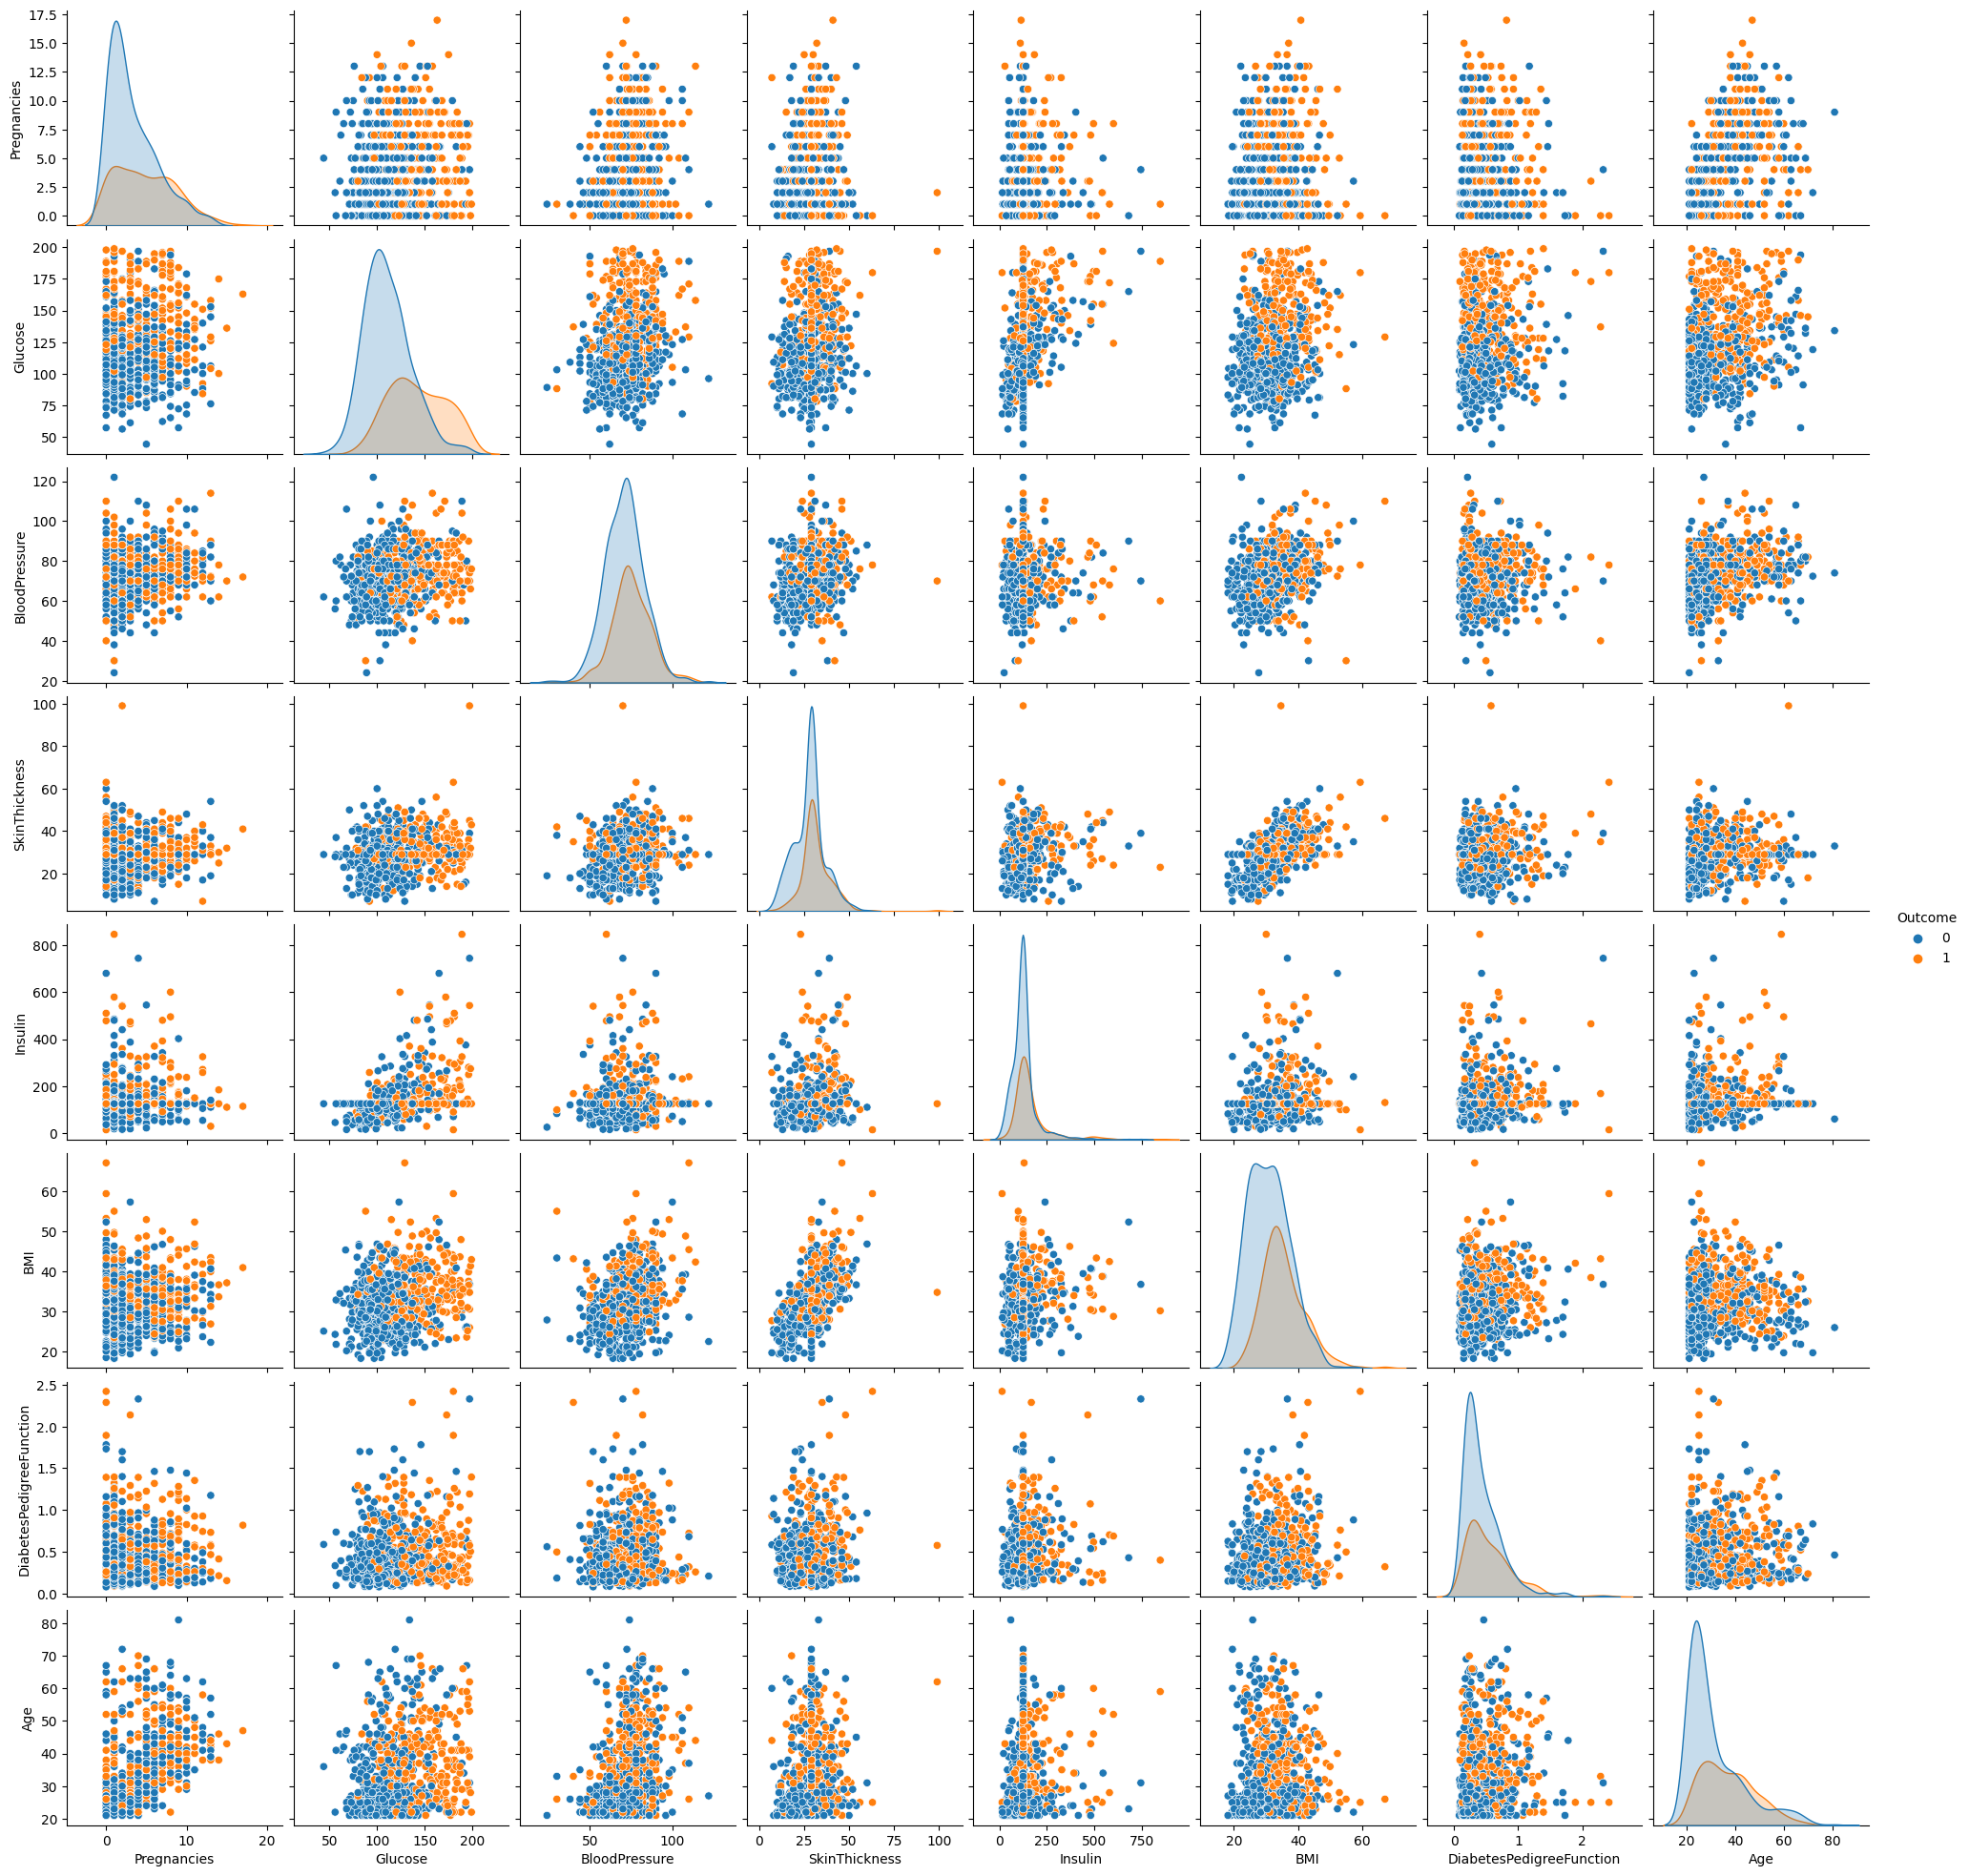

In [16]:
p=sns.pairplot(diabetes_data, hue = 'Outcome')

## Heatmap for data

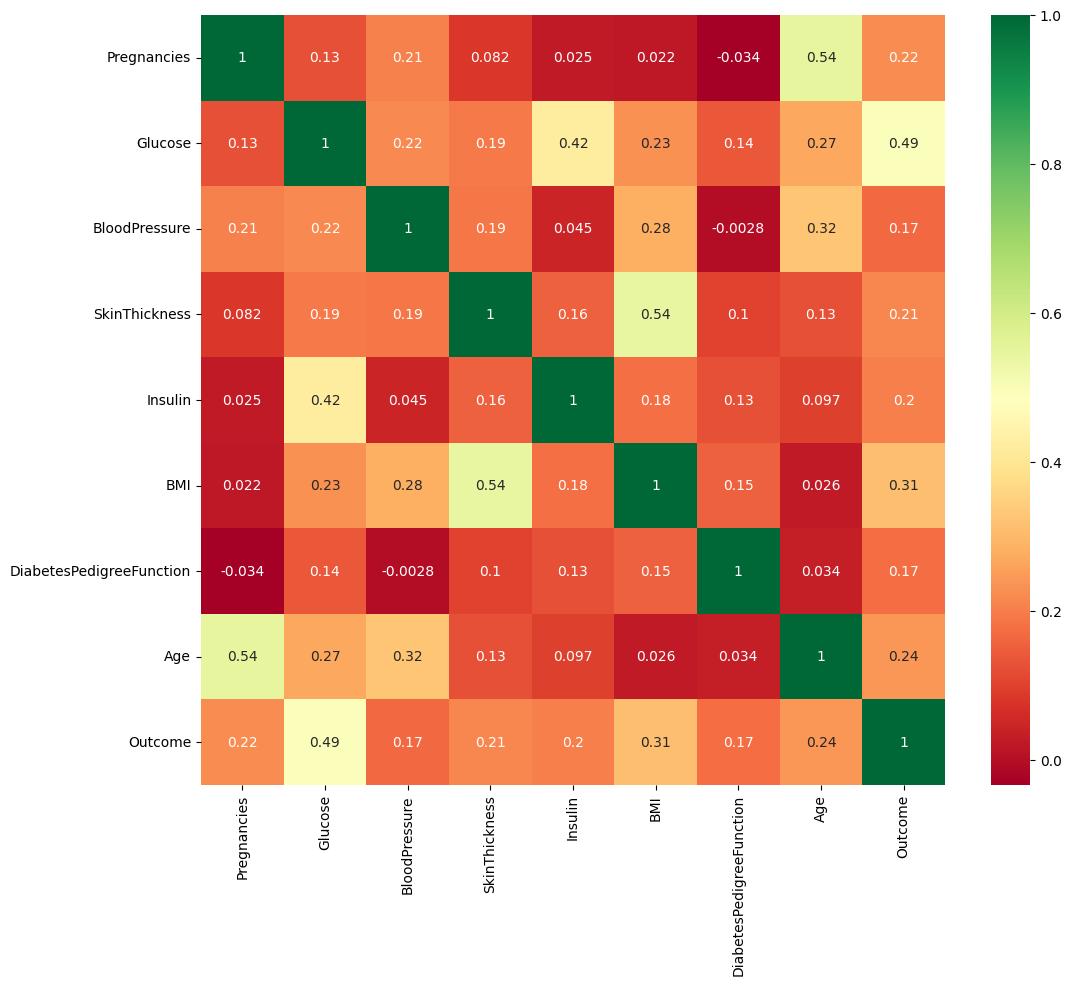

In [17]:
plt.figure(figsize=(12,10))
# using seaborn to plot heatmap
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  

In [58]:
X = diabetes_data.drop(["Outcome"],axis = 1)

In [59]:
y = diabetes_data.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Splitting into train and test data

In [60]:
#split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)
# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)


X_train (537, 8)
y_train (537,)
X_test (231, 8)
y_test (231,)


In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled,y_resampled = smote.fit_resample(X_train,y_train)

### * Logistic regression with SGD

- Building the model

In [62]:
# instantiate the 'SGDClassifier' to build model using SGD
# to perform logistic regression, consider the log-loss function 
# set 'random_state' to generate the same dataset each time you run the code 
SGD = SGDClassifier(loss = 'log', random_state = 10)

# fit the model on scaled training data
logreg_with_SGD = SGD.fit(X_resampled, y_resampled)

In [63]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg_with_SGD.predict(X_test) 

# print the y_pred_prob
y_pred_prob

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### Plotting confusion matrix

In [64]:
cm = confusion_matrix(y_test, y_pred_prob)
cm

array([[141,   3],
       [ 77,  10]], dtype=int64)

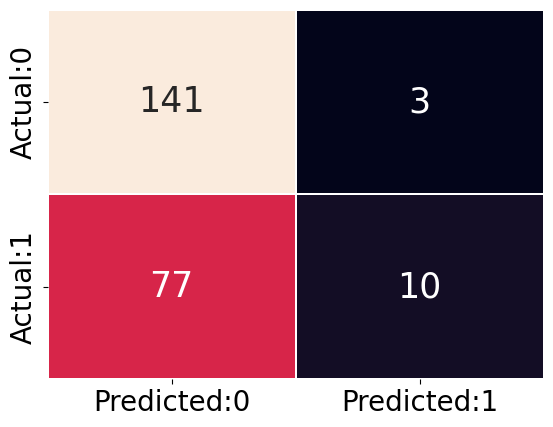

In [65]:
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd',cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

### Plot the ROC curve

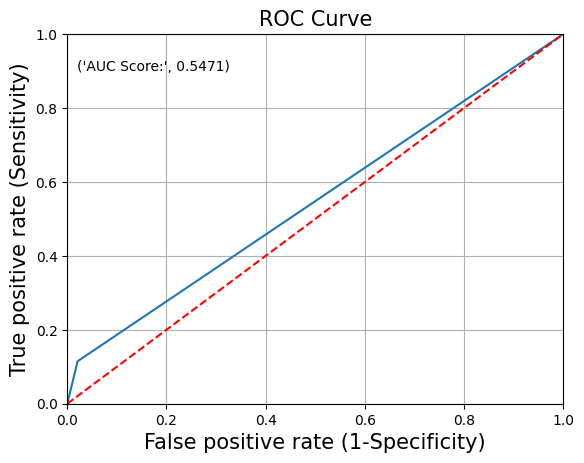

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
plt.plot(fpr, tpr)

    # set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
plt.grid(True)

In [68]:
# accuracy measures by classification_report()
SGD_result = classification_report(y_test, y_pred_prob )

# print the result
print(SGD_result)

              precision    recall  f1-score   support

           0       0.65      0.98      0.78       144
           1       0.77      0.11      0.20        87

    accuracy                           0.65       231
   macro avg       0.71      0.55      0.49       231
weighted avg       0.69      0.65      0.56       231



In [69]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred_prob)

0.11315865246184853

Tabulate the results

In [74]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score':precision_score(y_test, y_pred_prob),
                                    'Recall Score': recall_score(y_test, y_pred_prob),
                                    'Accuracy Score': accuracy_score(y_test, y_pred_prob),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred_prob),
                                    'f1-score':  f1_score(y_test, y_pred_prob)}, 
                                    ignore_index = True)
    return(score_card)

In [75]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression' as model name to the function
update_score_card(model_name = 'Logistic Regression with SGD')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression with SGD,0.547055,0.769231,0.114943,0.65368,0.113159,0.2


### * Random forest model

- Now we build a model using random forest 

In [77]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=10)
clf.fit(X_resampled,y_resampled)

RandomForestClassifier(random_state=10)

In [92]:
#make predictions
preds = clf.predict(X_test)

- calculating accuracy

In [79]:
accuracy = accuracy_score(y_test, y_pred_prob)
print("Accuracy:", accuracy)

Accuracy: 0.6536796536796536


- confusion matrix

In [80]:
confusion_matrix(y_test, y_pred_prob)

array([[141,   3],
       [ 77,  10]], dtype=int64)

- Plot the ROC curve

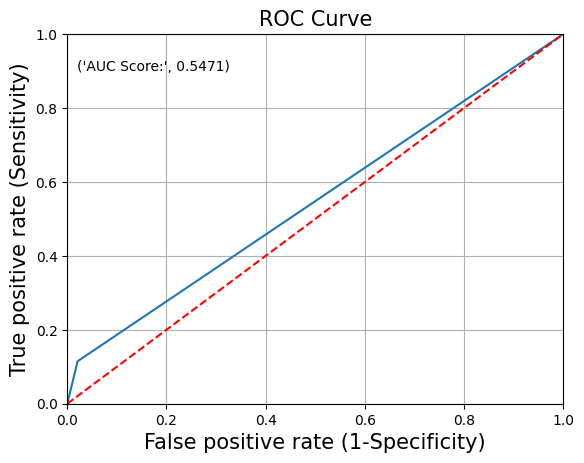

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
plt.plot(fpr, tpr)

    # set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
plt.grid(True)

In [94]:
# accuracy measures by classification_report()
RF_result = classification_report(y_test, y_pred_prob)

# print the result
print(RF_result)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       144
           1       0.65      0.69      0.67        87

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.74      0.74      0.74       231



- Tabulate the result

In [83]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score':precision_score(y_test, y_pred_prob),
                                    'Recall Score': recall_score(y_test, y_pred_prob),
                                    'Accuracy Score': accuracy_score(y_test, y_pred_prob),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred_prob),
                                    'f1-score':  f1_score(y_test, y_pred_prob)}, 
                                    ignore_index = True)
    return(score_card)

In [84]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression' as model name to the function
update_score_card(model_name = 'Random Forest')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Random Forest,0.547055,0.769231,0.114943,0.65368,0.113159,0.2


### Adaboost

- Build the model

In [85]:
from sklearn.ensemble import AdaBoostClassifier

# build the model
adaboost = AdaBoostClassifier(random_state=10)
# fit the model
adaboost.fit(X_resampled, y_resampled)


AdaBoostClassifier(random_state=10)

In [86]:
# predict the values
y_pred_prob  = adaboost.predict(X_test)

In [87]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_prob)
cm

array([[111,  33],
       [ 27,  60]], dtype=int64)

- Plotting the ROC curve

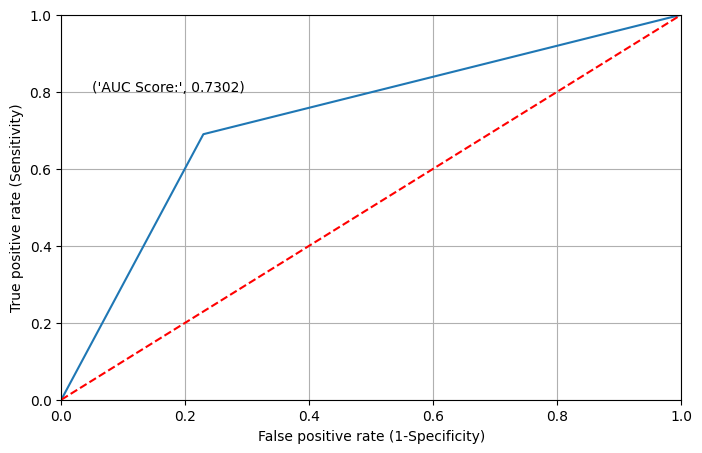

In [88]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [93]:
# accuracy measures by classification_report()
adaboost_result = classification_report(y_test, y_pred_prob)

# print the result
print(adaboost_result)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       144
           1       0.65      0.69      0.67        87

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.74      0.74      0.74       231



- Tabulate the result

In [90]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score':precision_score(y_test, y_pred_prob),
                                    'Recall Score': recall_score(y_test, y_pred_prob),
                                    'Accuracy Score': accuracy_score(y_test, y_pred_prob),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred_prob),
                                    'f1-score':  f1_score(y_test, y_pred_prob)}, 
                                    ignore_index = True)
    return(score_card)

In [91]:
#use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression' as model name to the function
update_score_card(model_name = 'Adaboost')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Adaboost,0.730244,0.645161,0.689655,0.74026,0.454288,0.666667


So, we can say that the result given by Adaboost is better than logistic regression using SGD and Random forest model

### * Conclusion

- Libraries like matplotlib, Numpy, Pandas, seaborn and other libraries were used to develop better insights about the data
- We did Data preprocessing which helped in dealing with missing values handling, feature scaling etc
- We drew inferences on the features which are highly correlated
- We came to know through analysis that Adaboost model worked better in predicting whether someone has diabetes or not 
- This project helped me to gain insights and how we should approach the problem, hence attain results with good accuracy